<a href="https://colab.research.google.com/github/Israel-San-Agustin/METODOS-NUMERICOS-/blob/main/Polinomio_Interpolante_de_Newton_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Polinomio$ $Interpolante$ $de$ $Newton$

In [13]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [14]:
# Calcular el polinomio de interpolación de Newton.
def interpolacion_newton(x_values, y_values):
    x = sp.symbols('x')  # Variable simbólica
    n = len(x_values)  # Número de puntos
    diff_table = y_values[:]  # Inicializar tabla de diferencias
    poly = 0  # Polinomio inicial
    term = 1  # Término acumulativo para el polinomio

    # Construir el polinomio
    for i in range(n):
        poly += diff_table[0] * term
        term *= (x - x_values[i])  # Actualizar el término acumulativo
        diff_table = [(diff_table[j + 1] - diff_table[j]) / (x_values[j + i + 1] - x_values[j]) for j in range(len(diff_table) - 1)]

    return sp.simplify(poly)

In [15]:
# Calcula las diferencias sucesivas de un conjunto de valores F.
def calcular_diferencias_sucesivas(F):
    diferencias = [np.diff(F)]  # Inicializar con la primera diferencia
    while len(diferencias[-1]) > 1:
        diferencias.append(np.diff(diferencias[-1]))
    return diferencias

In [16]:
# Calcula la tabla de diferencias divididas.
def diferencias_divididas(x, F):
    n = len(x)
    tabla = np.zeros((n, n))
    tabla[:, 0] = F
    for j in range(1, n):
        for i in range(n - j):
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x[i + j] - x[i])
    return tabla

In [17]:
# Evalúa el polinomio de Newton en un punto dado.
def polinomio_newton(x_dado, x, tabla):
    n = len(x)
    resultado = tabla[0, 0]
    producto = 1
    for i in range(1, n):
        producto *= (x_dado - x[i - 1])
        resultado += tabla[0, i] * producto
    return resultado

In [18]:
# Graficar el polinomio y los puntos dados
def graficar(x, F, polinomio):
    # Evaluar el polinomio en un rango de valores para graficarlo
    x_vals = np.linspace(min(x), max(x), 500)
    y_vals = [polinomio.subs('x', val) for val in x_vals]

    # Graficar el polinomio interpolante
    plt.plot(x_vals, y_vals, label="Polinomio Interpolante", color="green")

    # Graficar los puntos originales
    plt.scatter(x, F, color="red", label="Puntos dados", zorder=5)
    plt.title("Interpolación de Newton")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

Diferencias sucesivas:
Δ1: [ 0.09 -0.14 -0.17]
Δ2: [-0.23 -0.03]
Δ3: [0.2]

Tabla de diferencias divididas:
-0.1      0.52000    0.90000    -5.33333   5.00000   
0.0       0.61000    -0.70000   -3.33333  
0.2       0.47000    -1.70000  
0.3       0.30000   

Polinomio de Newton:
4.99999999999999*x**3 - 5.83333333333333*x**2 + 0.266666666666667*x + 0.61

El polinomio de Newton evaluado en x = 0.25 es: 0.39021


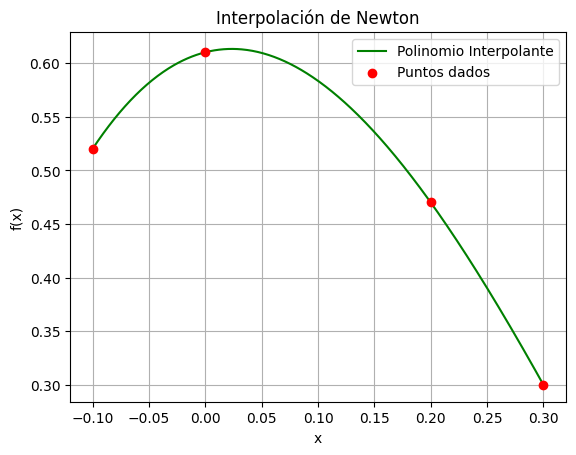

In [19]:
if __name__ == "__main__":
    # Datos iniciales directamente en el código
    X = np.array([-0.1, 0.0, 0.2, 0.3], dtype=float)
    F = np.array([0.52, 0.61, 0.47, 0.30], dtype=float)

    # Calcular y mostrar diferencias sucesivas
    diferencias = calcular_diferencias_sucesivas(F)
    print("Diferencias sucesivas:")
    for idx, dif in enumerate(diferencias, start=1):
        print(f"\u0394{idx}: {dif}")

    # Calcular diferencias divididas y mostrar tabla
    tabla_dif = diferencias_divididas(X, F)
    print("\nTabla de diferencias divididas:")
    for i in range(len(X)):
        print(f"{X[i]:<10}" + " ".join([f"{tabla_dif[i, j]:<10.5f}" for j in range(len(X) - i)]))

    # Calcular el polinomio de Newton
    polinomio = interpolacion_newton(X, F)
    print("\nPolinomio de Newton:")
    print(polinomio)

    # Evaluar el polinomio en un punto dado
    xi = 0.25
    resultado = polinomio_newton(xi, X, tabla_dif)
    print(f"\nEl polinomio de Newton evaluado en x = {xi} es: {resultado:.5f}")

    # Graficar el polinomio y los puntos originales
    graficar(X, F, polinomio)
